<a href="https://colab.research.google.com/github/rubensdmp/GeoPython/blob/main/KML/Build_KML_Fr_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import xml.etree.ElementTree as ET

from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import numpy as np


### Cargamos CSV


In [29]:
df = pd.read_csv ('earth.csv', delimiter= ';')
df.columns


C:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1,7,8,11,27,42,43,44,84,85,86,87,117,118,119,126,127,128,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,153,154,155,159,160,161,162,163,164,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,208,209,211,212,213,214,215,217,218,220,221,223,224,226,227,228,229,230,231,232,233,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,303,304,305,309,310,311,312,313,314,345,346,347,351,352,353,354,355,356,357,358,359,363,369,370,371,378,379,380,381,382,383,387,388,389,390,391,392,396,397,398,399,400,401,402,403,404,414,415,416,456,457,458,459,460,461,462,463,464,466,467,468,469,470,480,481,482,495,496,497) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['SAMPLE ID', 'IGSN', 'EXPEDITION ID', 'REFERENCES', 'LATITUDE',
       'LONGITUDE', 'LOC PREC', 'MIN ELEVATION', 'MAX ELEVATION',
       'TECTONIC SETTING',
       ...
       'H2O_P Method.1', 'H2O_M.2', 'H2O_M Units.2', 'H2O_M Method.2',
       'H2O_P.2', 'H2O_P Units.2', 'H2O_P Method.2', 'INDIUM.1',
       'INDIUM Units.1', 'INDIUM Method.1'],
      dtype='object', length=498)

TypeError: 'value' must be an instance of str or bytes, not a float

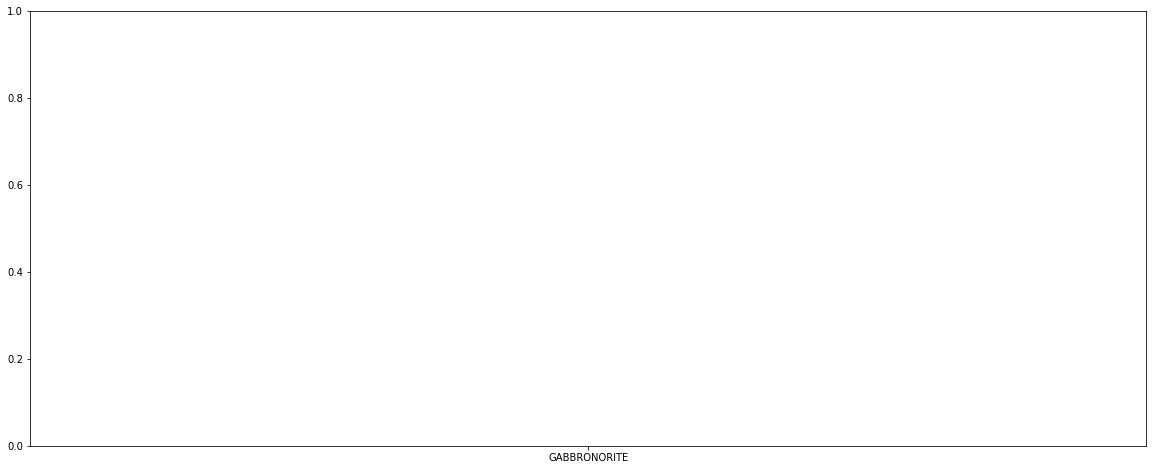

In [32]:
plt.rcParams["figure.figsize"] = (20,8)

ax1 = df.plot.scatter(y='SIO2',
                      x='ROCK NAME',
                      c='DarkBlue')

In [ ]:
tree = ET.parse('Base.kml')
root = tree.getroot()


path = "{http://www.opengis.net/kml/2.2}"
folder = root[0][4]

for i in range(len(df)):
    Placemark = ET.SubElement(folder, path + 'Placemark')
    ET.SubElement(Placemark, path + 'name').text = df.loc[i]['SAMPLE ID']
    ET.SubElement(Placemark, path + 'description').text = df.loc[i]['TECTONIC SETTING']
    
    LookAt = ET.SubElement(Placemark, path + 'LookAt')
    ET.SubElement(LookAt, path + 'longitude').text = str(df.loc[i]['LONGITUDE'])
    ET.SubElement(LookAt, path + 'latitude').text = str(df.loc[i]['LATITUDE'])

    ET.SubElement(Placemark, path + 'styleUrl').text = "#m_ylw-pushpin"
    ET.SubElement(Placemark, path + 'balloonVisibility').text = "1"

    Point = ET.SubElement(Placemark, path + 'Point')
    ET.SubElement(Point, path + 'drawOrder').text = "1"
    ET.SubElement(Point, path + 'coordinates').text = str(df.loc[i]['LONGITUDE']) + "," + str(df.loc[i]['LATITUDE']) + ",0" 
    

tree.write('Salida.kml')   

In [ ]:
## prueba de inserción de hijo


In [ ]:
#Insertamos como hijo de Placemark
path = "{http://www.opengis.net/kml/2.2}"
folder = root[0][4]

Placemark = ET.SubElement(folder, path + 'Placemark')
ET.SubElement(Placemark, path + 'name').text = "my first place"
ET.SubElement(Placemark, path + 'description').text = "un lugar bonito"

LookAt = ET.SubElement(Placemark, path + 'LookAt')
ET.SubElement(LookAt, path + 'longitude').text = "-55.89177578272917"
ET.SubElement(LookAt, path + 'latitude').text = "-33.14150541012881"

ET.SubElement(Placemark, path + 'styleUrl').text = "#m_ylw-pushpin"
ET.SubElement(Placemark, path + 'balloonVisibility').text = "1"

Point = ET.SubElement(Placemark, path + 'Point')
ET.SubElement(Point, path + 'drawOrder').text = "1"
ET.SubElement(Point, path + 'coordinates').text = "-55.89177578272917,-33.14150541012881,0"


tree.write('output.kml')   